In [1]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from utils.util import *
sns.set_theme()
sns.set_style("whitegrid")
# sns.set_context("paper")
sns.set_context("talk")

In [2]:
analyze_name = 'analyze_regression_exc'

In [3]:
with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)
# ----------------------
ctx_order = 'first'
ctx_order_str = 'ctxF'
# ----------------------
with open('../../results/%s_%s_results_rnn.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnncell.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxF = pickle.load(f)
# ----------------------
ctx_order = 'last'
ctx_order_str = 'ctxL'
# ----------------------
with open('../../results/%s_%s_results_rnn.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnncell.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxL = pickle.load(f)
# ----------------------
with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

with open('../../results/%s_results_mlp_cc.P' %(analyze_name), 'rb') as f:
    mlpcc_results = pickle.load(f)

In [4]:
mlp_runs          = dict_to_list(mlp_results, analyze_name)
rnn_runs_ctxF     = dict_to_list(rnn_results_ctxF, analyze_name)
rnncell_runs_ctxF = dict_to_list(rnncell_results_ctxF, analyze_name)
rnnb_runs_ctxF     = dict_to_list(rnnb_results_ctxF, analyze_name)
rnn_runs_ctxL     = dict_to_list(rnn_results_ctxL, analyze_name)
rnncell_runs_ctxL = dict_to_list(rnncell_results_ctxL, analyze_name)
rnnb_runs_ctxL     = dict_to_list(rnnb_results_ctxL, analyze_name)
swmlp_runs        = dict_to_list(swmlp_results, analyze_name)
mlpcc_runs        = dict_to_list(mlpcc_results, analyze_name)
mlp_runs.keys()

dict_keys(['excluded_states', 'p_vals', 't_vals', 'params', 'bses'])

In [5]:

param_mlp = np.asarray(mlp_runs['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_mlp = np.asarray(mlp_runs['p_vals'])

param_mlpcc = np.asarray(mlpcc_runs['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_mlpcc = np.asarray(mlpcc_runs['p_vals'])

param_rnn_ctxF = np.asarray(rnn_runs_ctxF['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_rnn_ctxF = np.asarray(rnn_runs_ctxF['p_vals'])

param_rnncell_ctxF = np.asarray(rnncell_runs_ctxF['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_rnncell_ctxF = np.asarray(rnncell_runs_ctxF['p_vals'])

param_rnnb_ctxF = np.asarray(rnnb_runs_ctxF['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_rnnb_ctxF = np.asarray(rnnb_runs_ctxF['p_vals'])

param_rnn_ctxL = np.asarray(rnn_runs_ctxL['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_rnn_ctxL = np.asarray(rnn_runs_ctxL['p_vals'])

param_rnncell_ctxL = np.asarray(rnncell_runs_ctxL['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_rnncell_ctxL = np.asarray(rnncell_runs_ctxL['p_vals'])

param_rnnb_ctxL = np.asarray(rnnb_runs_ctxL['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val_rnnb_ctxL = np.asarray(rnnb_runs_ctxL['p_vals'])

param = np.asarray(swmlp_runs['params']) # [runs, checkpoints, n_combinations]: [20, 21, 120]
p_val = np.asarray(swmlp_runs['p_vals'])
runs, checkpoints, n_states, ncoef = np.asarray(param_mlp).shape
print('runs, checkpoints, n_states, ncoef: ', runs, checkpoints, n_states, ncoef)
param_swmlp = np.zeros([runs, checkpoints, 2, n_states, ncoef])
p_val_swmlp = np.zeros([runs, checkpoints, 2, n_states, ncoef])
for r in range(runs):
    for cp in range(checkpoints):
        param_swmlp[r,cp,:,:] = param[r,cp]
        p_val_swmlp[r,cp,:,:] = p_val[r,cp]

runs, checkpoints, n_states, ncoef:  20 21 18 3


- Each plot shows the regression results after excluding that state
- e.g, plot for state0, means when we exclude idx0 which is (0,0) from the pairs and then did the regression, how the results look like

# Only RNN - 4X4 plot
- only last checkpoint (last step in training)
- all runs
- each state would be in that 4X4
- for when excluded two (0,0) and (3,3) (idx 0 and idx15), 
- and for when excluded all corners (0,0), (3,3), (0,3), (3,0) (idx: 0, 15, 3, 12)
- plot two other figs

In [6]:
from itertools import permutations
locs = [(i,j) for i in range(4) for j in range(4)]
idxs = [i for i in range(len(locs))]
idx2loc = {idx:loc for idx, loc in zip(idxs,locs)}

In [22]:
def plot_reg_exc(ctx_order, ctx_order_str, param, p_val, model_str, mfig_str, cp = 20):    
    checkpoints = 1 #param_rnn.shape[1]

    fig, axs = plt.subplots(4, 4, figsize=(30,20))
    val_name = 'wE'
    coef = 2
    for state in range(n_states):
        val = param[:,cp,state,coef]
        df = pd.DataFrame(val, columns= np.arange(checkpoints))
        df.insert(0, 'runs', np.arange(runs))
        df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)

        if state==16:
            fig2, ax = plt.subplots()
            if ctx_order is not None:
                fig2.suptitle('Regression Results at Step %s - %s - Ax %s - Exc. State 0 and 15' %(cp, model_str, ctx_order), fontweight='bold', fontsize='15')
            else:
                fig2.suptitle('Regression Results at Step %s - %s - Exc. State 0 and 15' %(cp, model_str), fontweight='bold', fontsize='15')

        elif state==17:
            fig3, ax = plt.subplots()
            if ctx_order is not None:
                fig3.suptitle('Regression Results at Step %s - %s - Ax %s - Exc. State 0, 3, 12 and 15' %(cp, model_str, ctx_order), fontweight='bold', fontsize='15')
            else:
                fig3.suptitle('Regression Results at Step %s - %s - Exc. State 0, 3, 12 and 15' %(cp, model_str), fontweight='bold', fontsize='15')

        else:
            # plot
            row, col = idx2loc[state][0], idx2loc[state][1]
            ax = axs[row][col]
            if ctx_order is not None:
                fig.suptitle('Regression Results at Step %s - %s - Ax %s' %(cp, model_str, ctx_order), fontweight='bold', fontsize='32')
            else:
                fig.suptitle('Regression Results at Step %s - %s' %(cp, model_str), fontweight='bold', fontsize='32')

            ax.set_title('W/O S%s' %(state), fontweight='bold')
        ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
        ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
        for i, p in enumerate(p_val[:, cp, state, coef]):
            s = '*' if p<0.05 else ' '
            ax.annotate(s, (0, param[i, cp, state, coef]), color='r')
        
        ax.axhline(y=0, color='r', linewidth=2)
        ax.set_ylim([-0.5, 1.3])
        ax.axes.xaxis.set_visible(False)
        plt.tight_layout()
        
    fig_str = '%s_exc_allstates_reg_results_%s_hidds' %(ctx_order_str, mfig_str)
    fig2_str = '%s_exc_state0and15_reg_results_%s_hidds' %(ctx_order_str, mfig_str)
    fig3_str = '%s_exc_allcorners_reg_results_%s_hidds' %(ctx_order_str, mfig_str)

    fig.savefig(('../../figures/' + fig_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)
    fig2.savefig(('../../figures/' + fig2_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)
    fig3.savefig(('../../figures/' + fig3_str + '.pdf'), bbox_inches = 'tight', pad_inches = 0)

    fig.savefig(('../../figures/' + fig_str + '.png'), bbox_inches = 'tight', pad_inches = 0)
    fig2.savefig(('../../figures/' + fig2_str + '.png'), bbox_inches = 'tight', pad_inches = 0)
    fig3.savefig(('../../figures/' + fig3_str + '.png'), bbox_inches = 'tight', pad_inches = 0)

# MLP

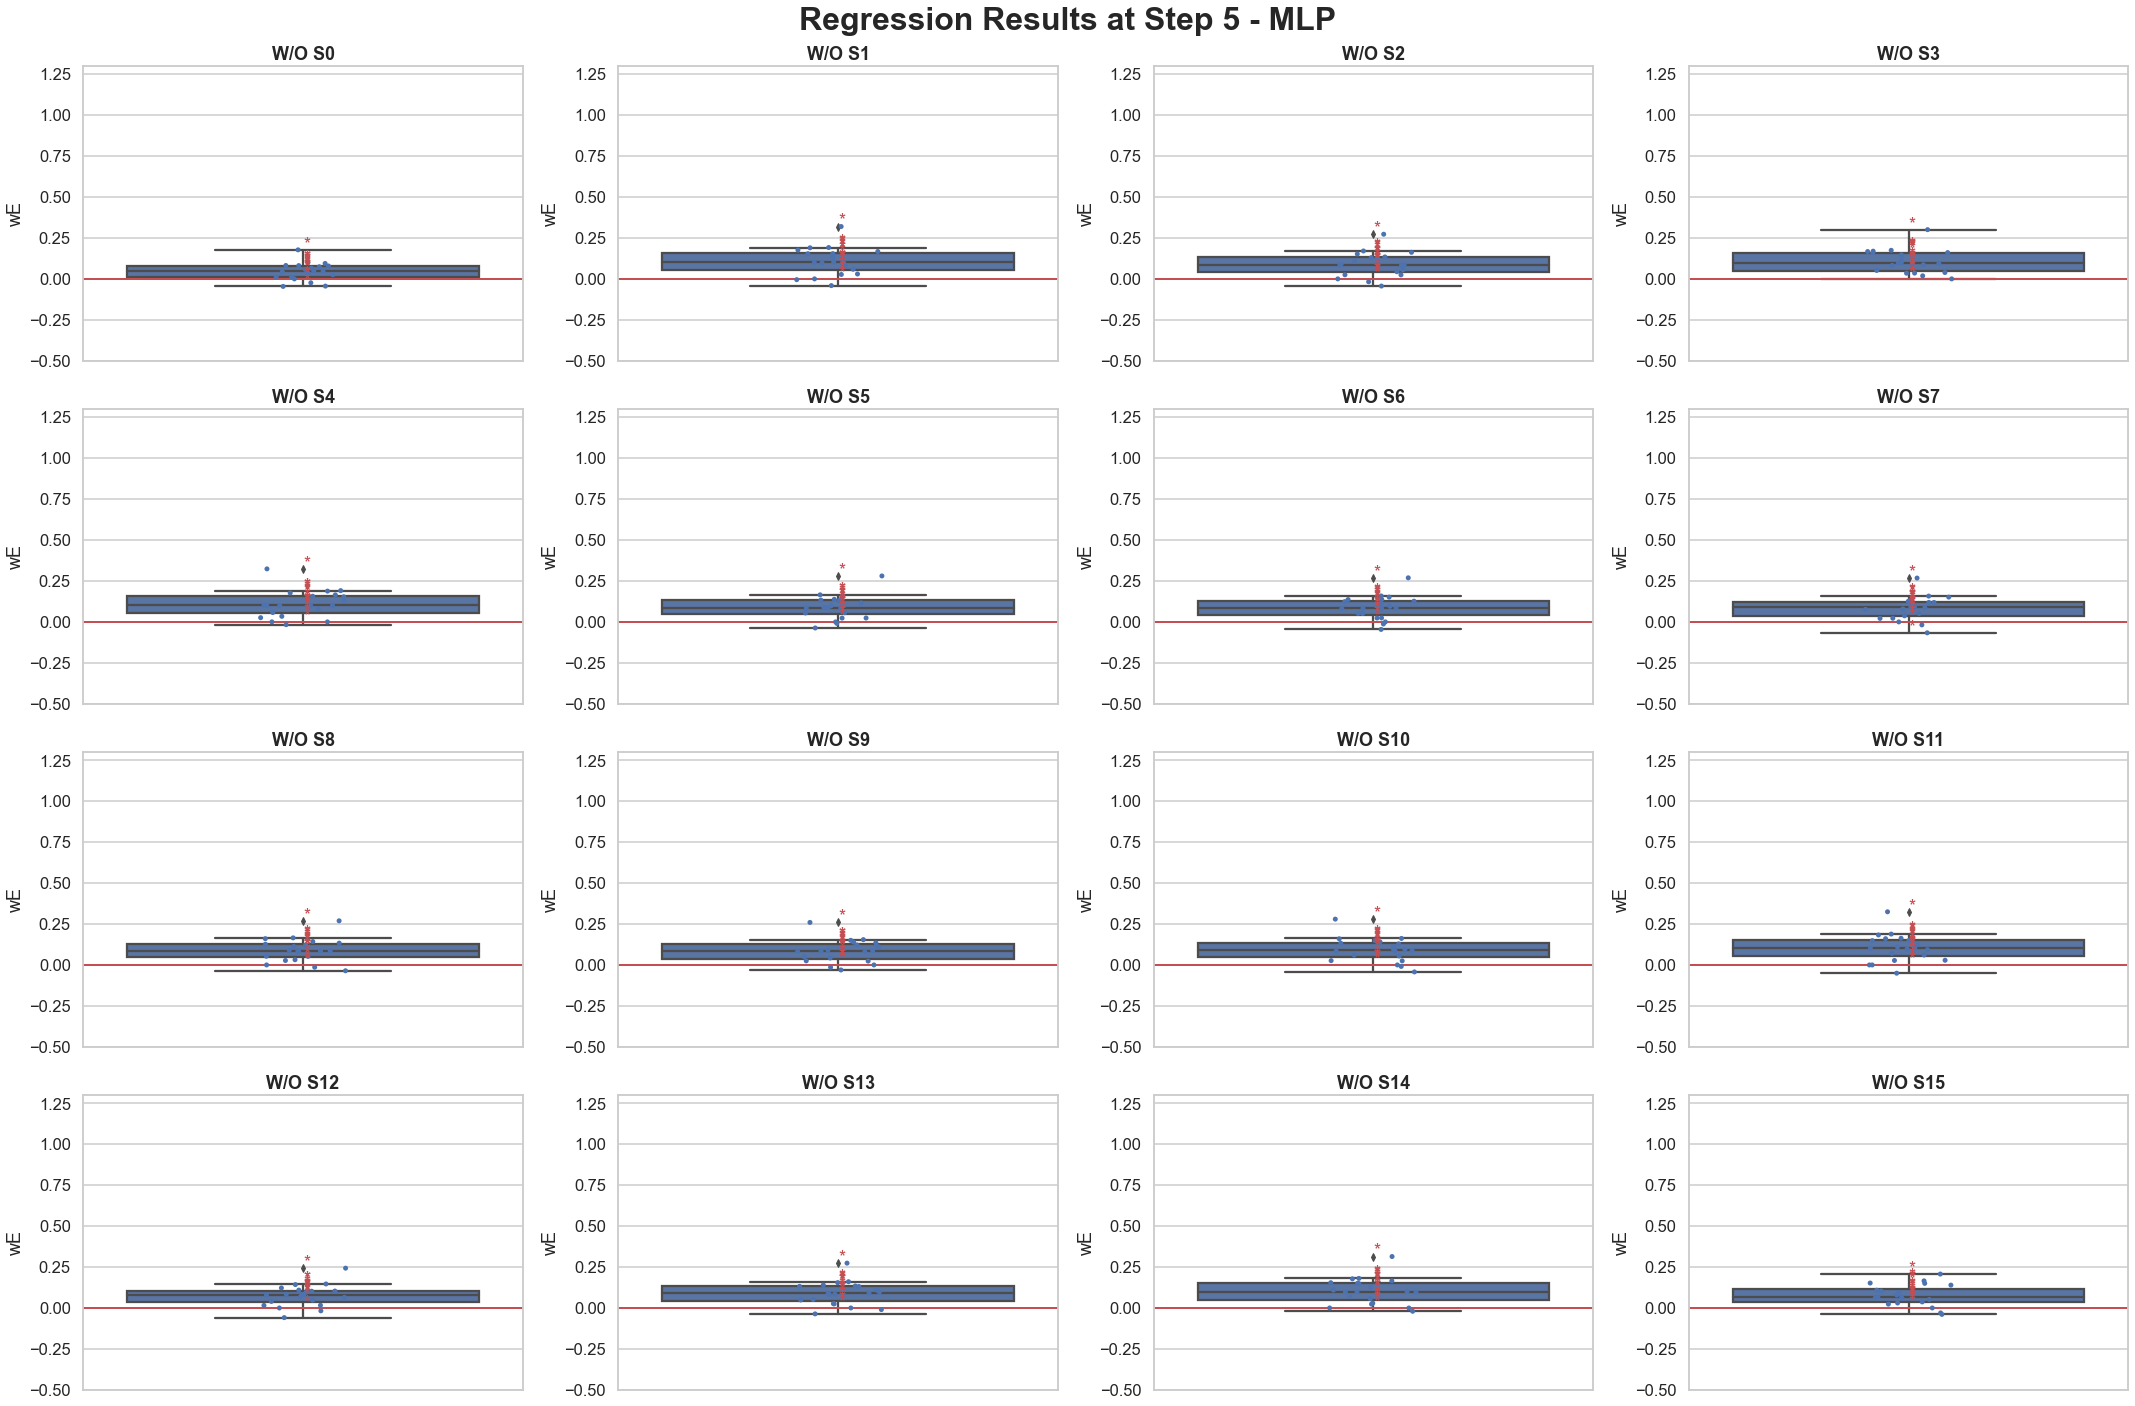

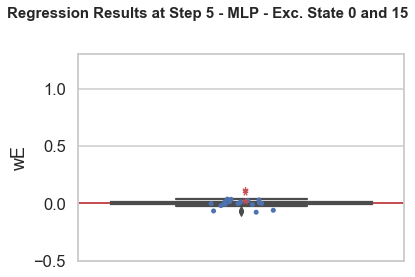

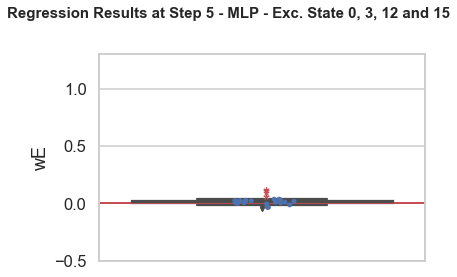

In [12]:
ctx_order, ctx_order_str = None, None
plot_reg_exc(ctx_order, ctx_order_str, param_mlp, p_val_mlp, 'MLP', 'mlp', cp = 5)

# RNN

In [23]:
ctx_order, ctx_order_str = 'first', 'ctxF'
plot_reg_exc(ctx_order, ctx_order_str, param_rnn_ctxF, p_val_rnn_ctxF, 'RNN', 'rnn')

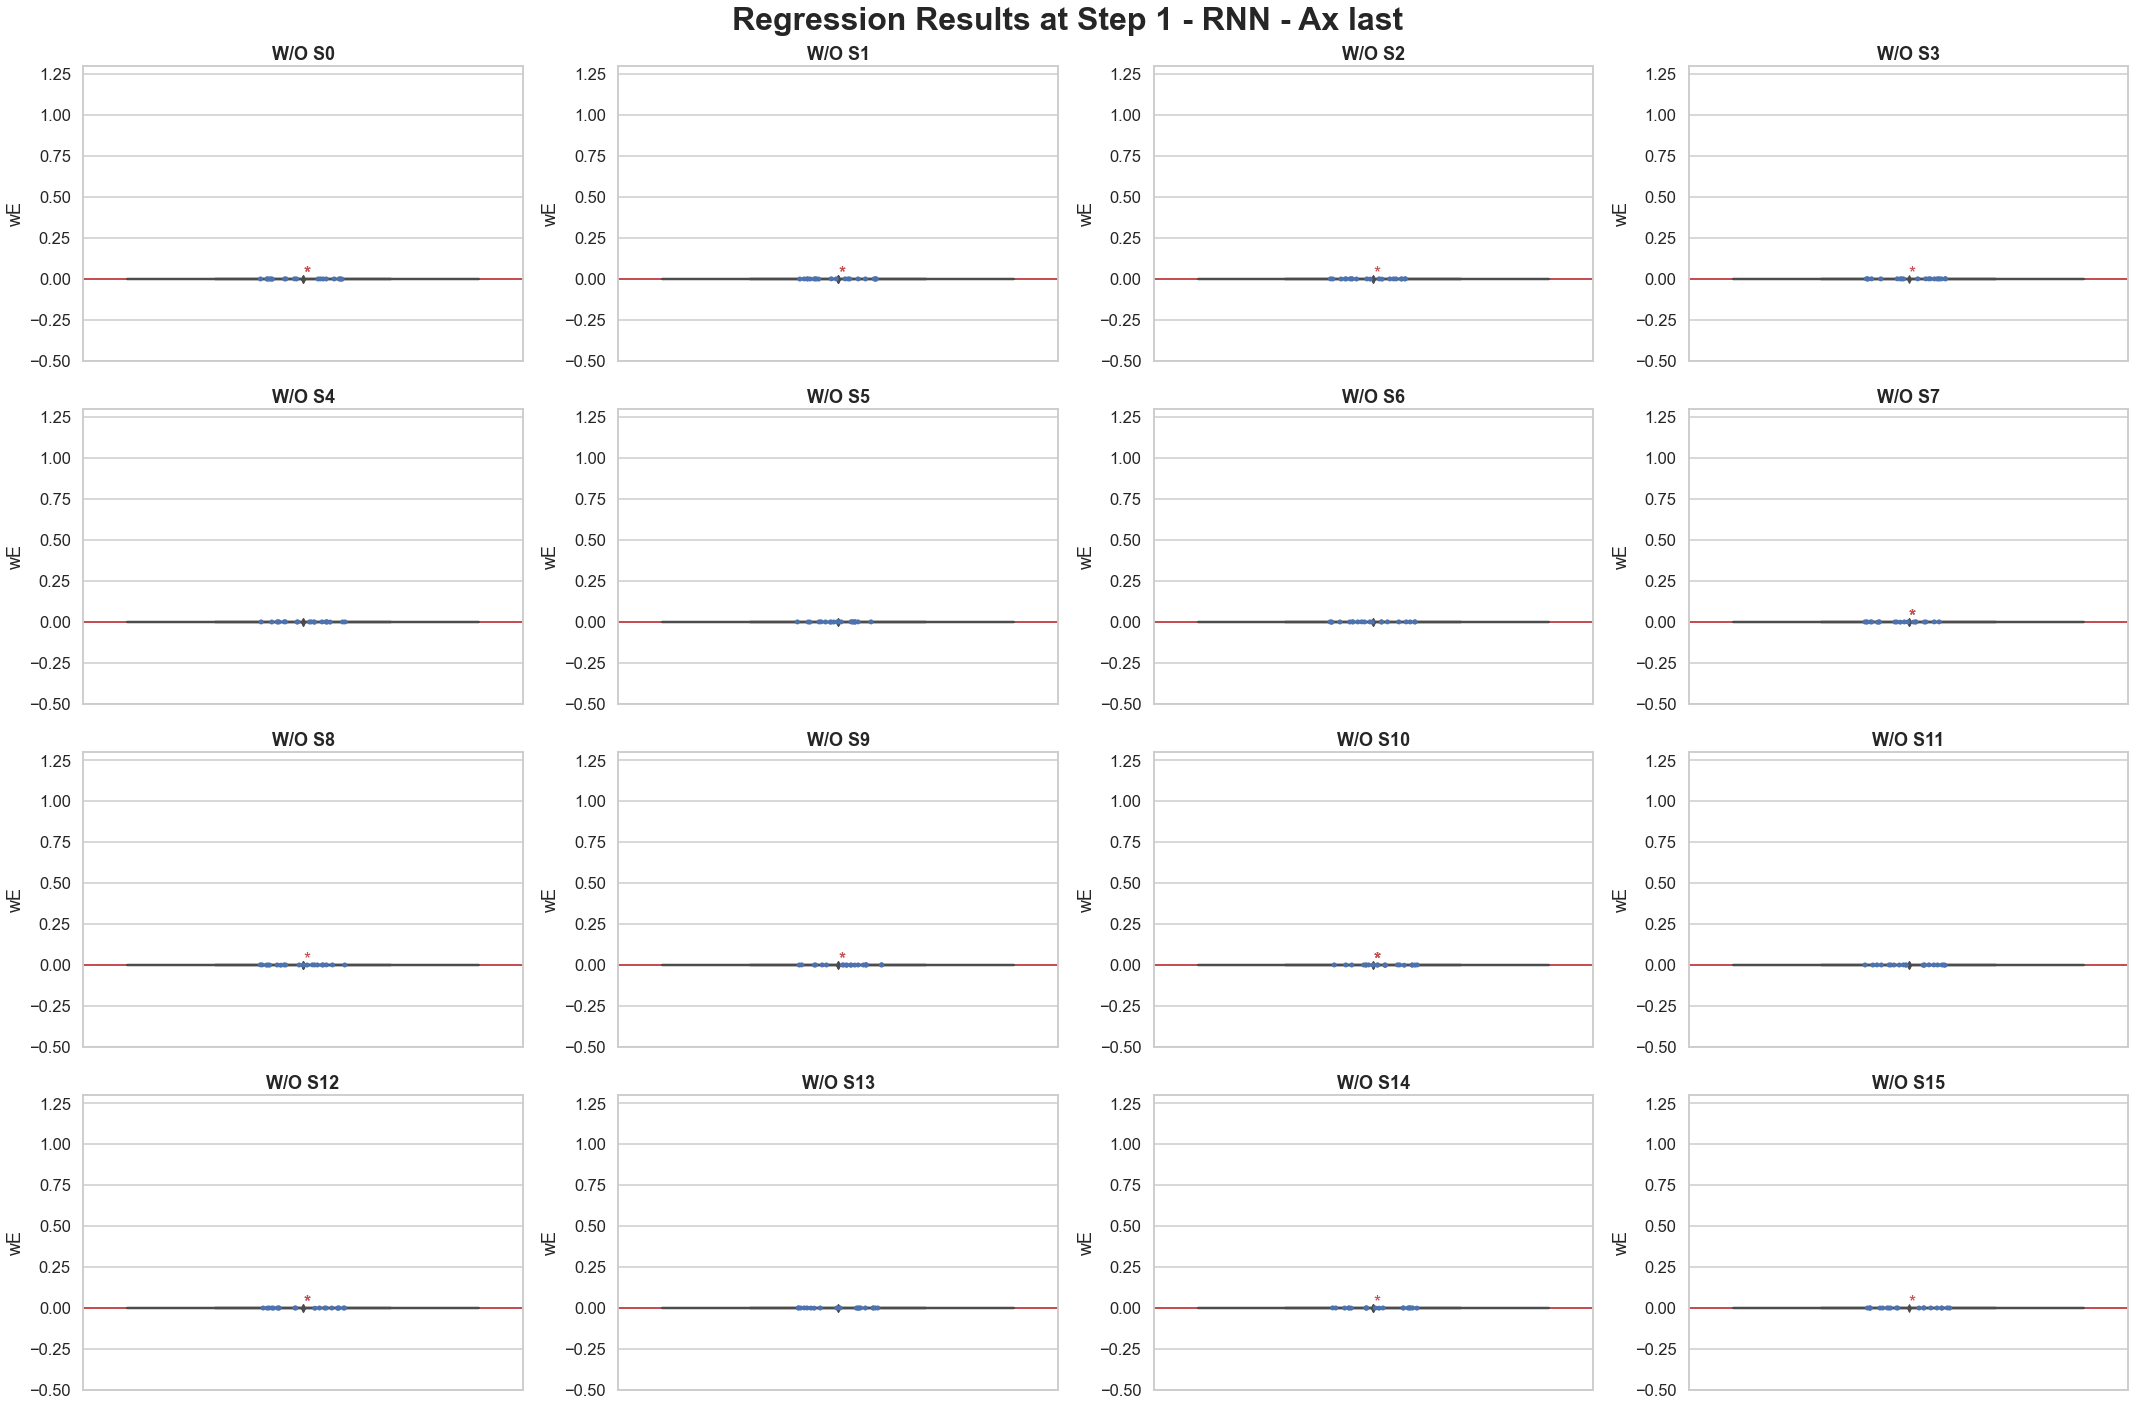

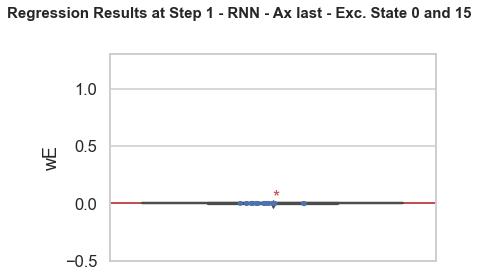

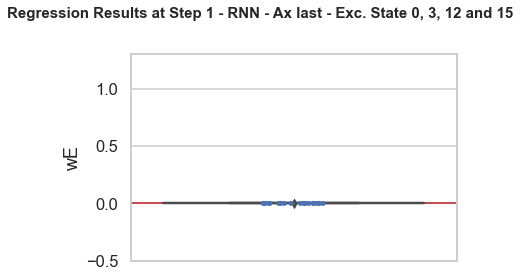

In [ ]:
ctx_order, ctx_order_str = 'last', 'ctxL'
plot_reg_exc(ctx_order, ctx_order_str, param_rnn_ctxL, p_val_rnn_ctxL, 'RNN', 'rnn')

# Truncated backprop - RNNCell

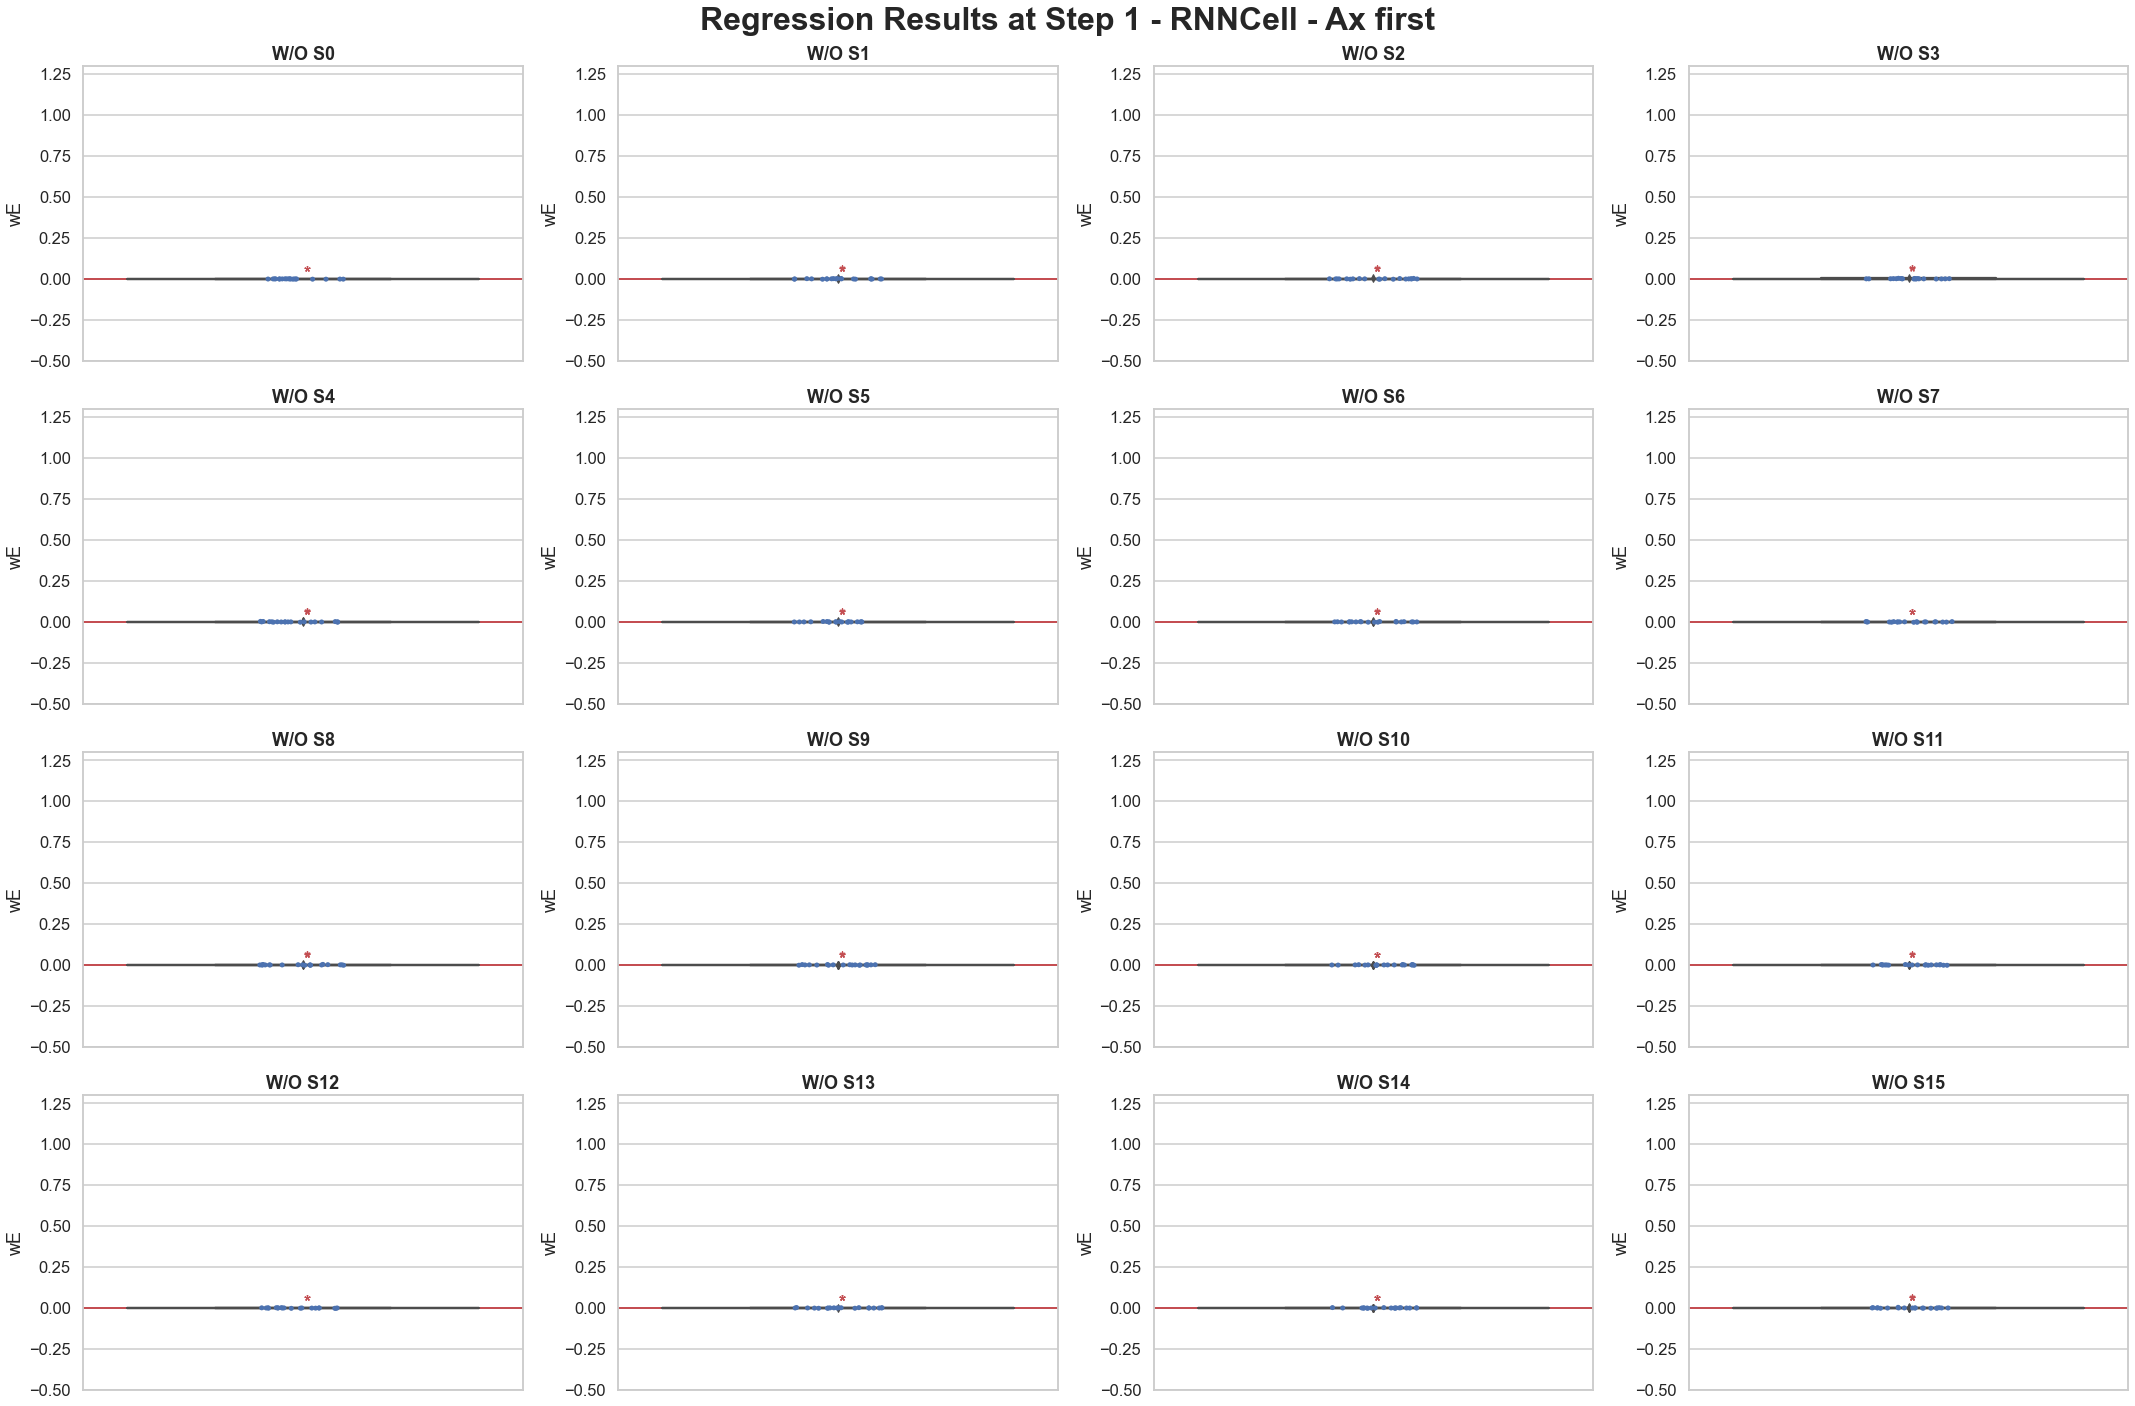

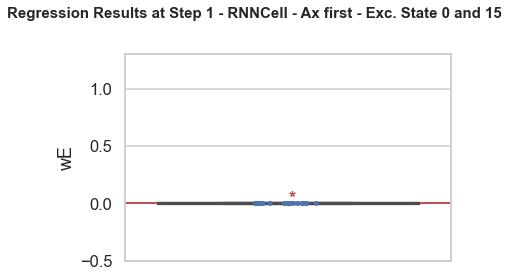

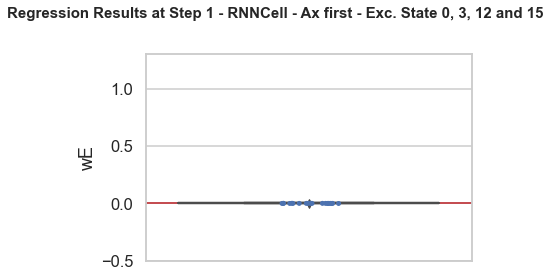

In [ ]:
ctx_order, ctx_order_str = 'first', 'ctxF'
plot_reg_exc(ctx_order, ctx_order_str, param_rnncell_ctxF, p_val_rnncell_ctxF, 'RNNCell', 'rnncell')

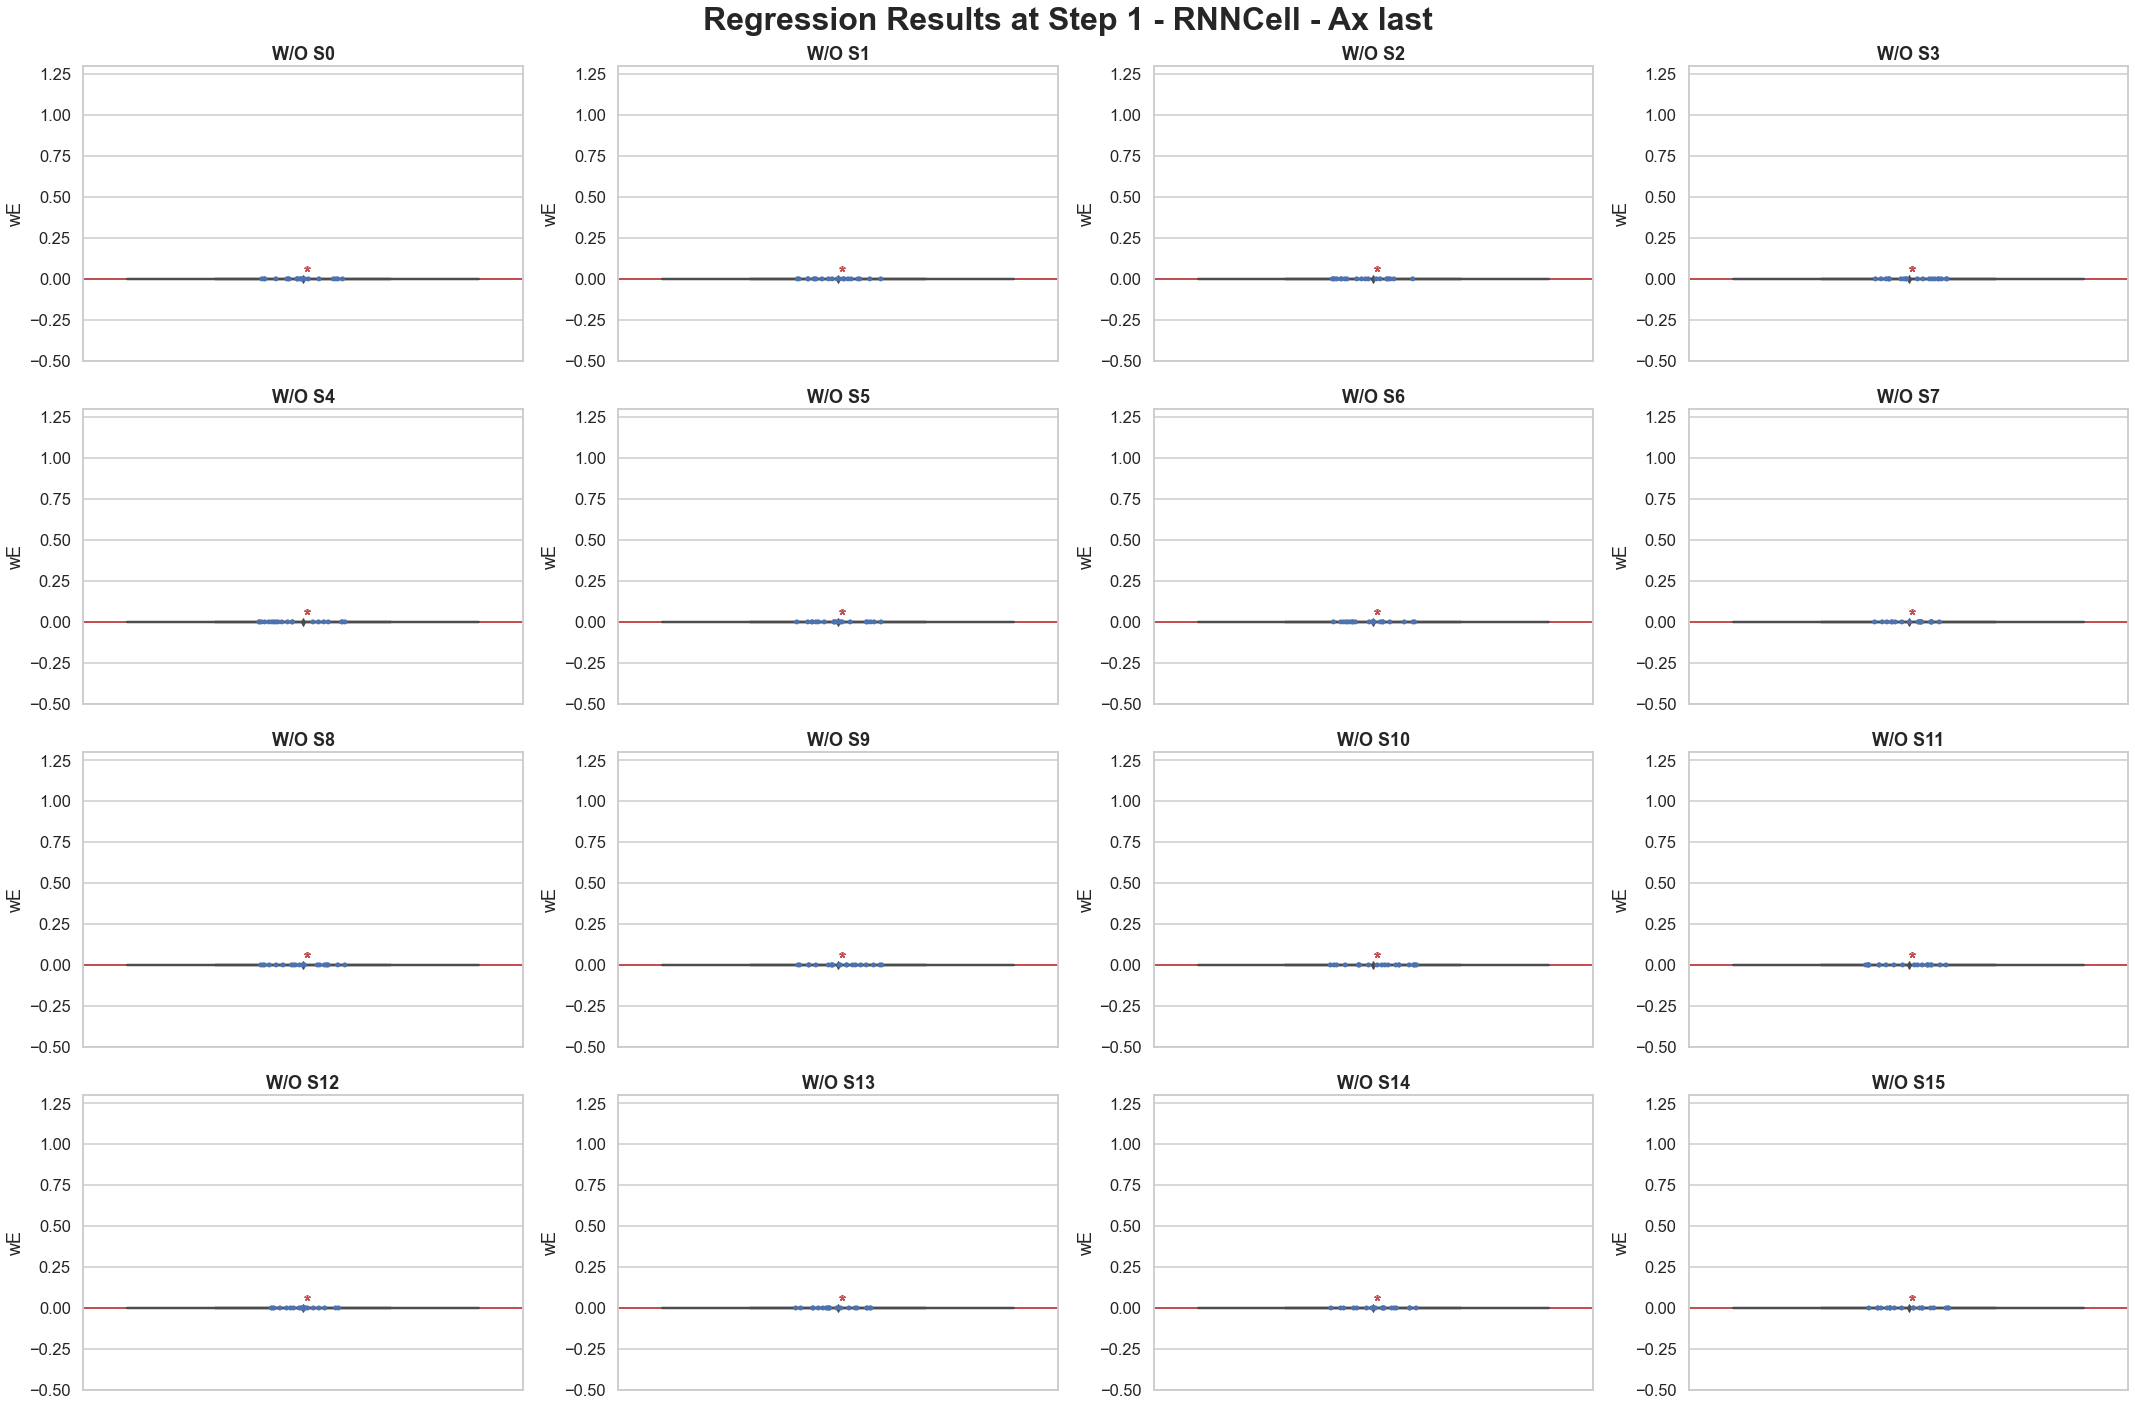

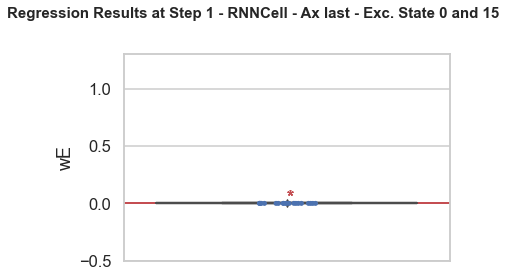

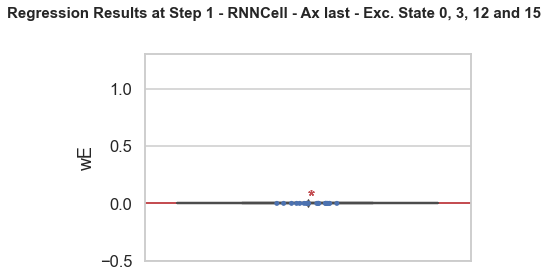

In [ ]:
ctx_order, ctx_order_str = 'last', 'ctxL'
plot_reg_exc(ctx_order, ctx_order_str, param_rnncell_ctxL, p_val_rnncell_ctxL, 'RNNCell', 'rnncell')

# Balanced data - RNN

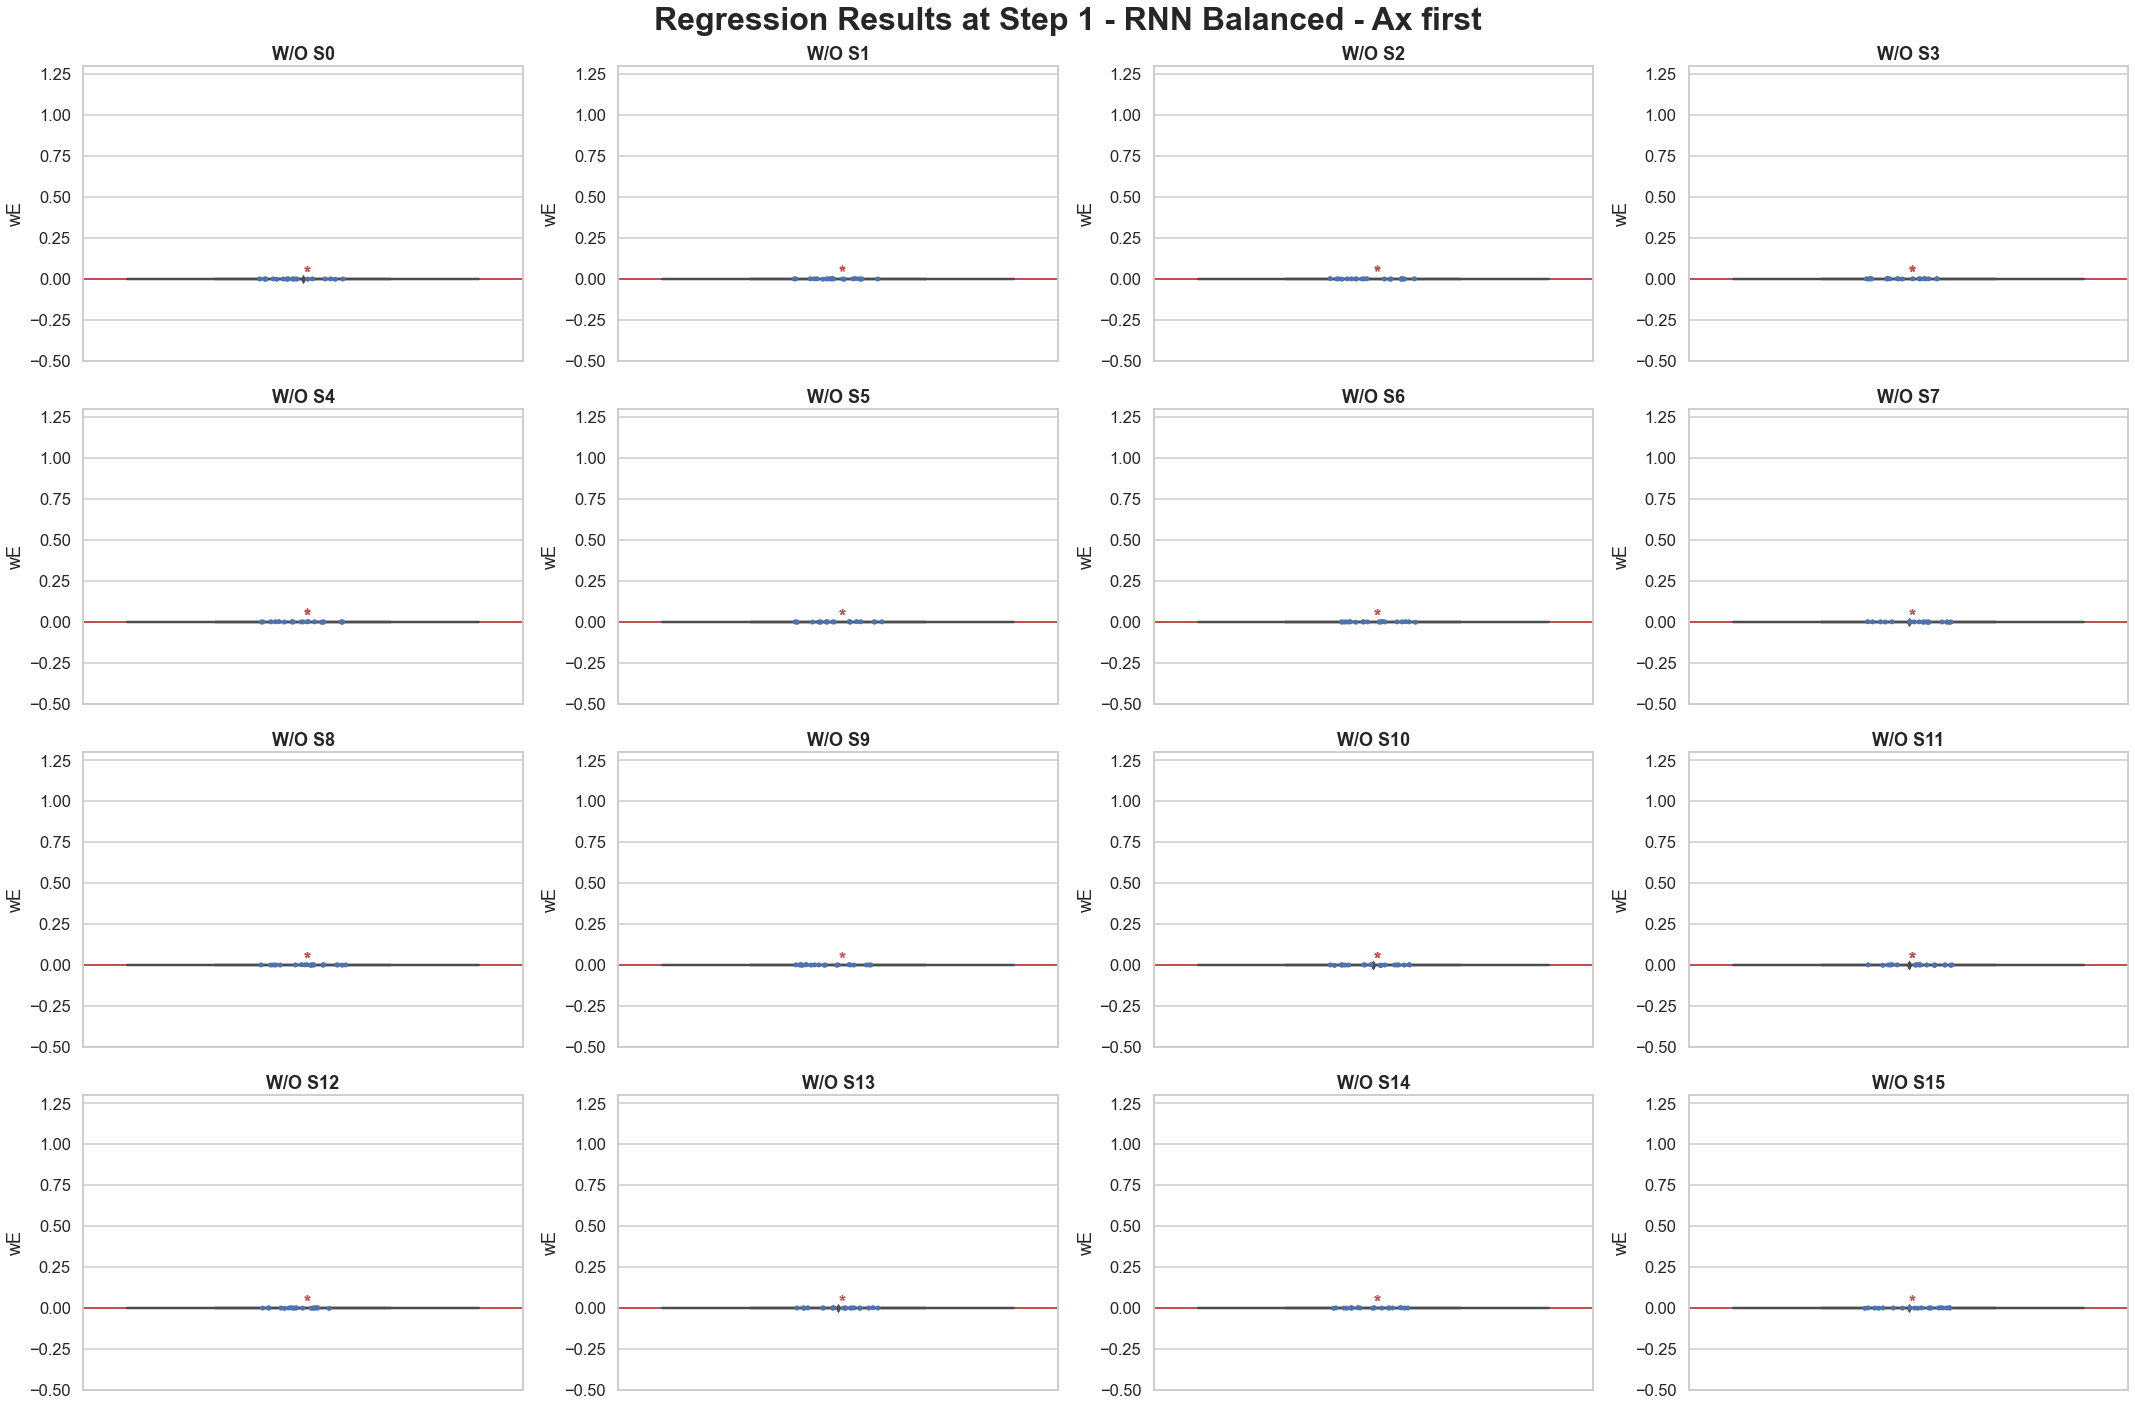

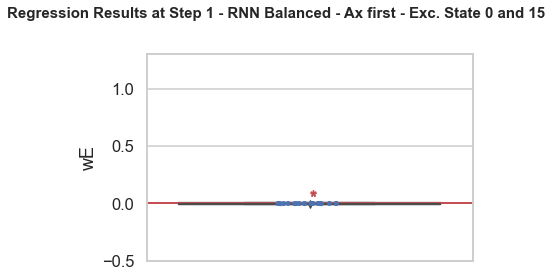

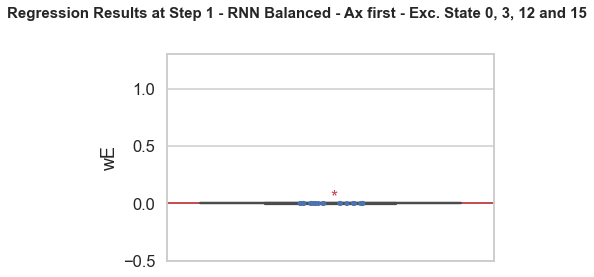

In [ ]:
ctx_order, ctx_order_str = 'first', 'ctxF'
plot_reg_exc(ctx_order, ctx_order_str, param_rnnb_ctxF, p_val_rnnb_ctxF, 'RNN Balanced', 'rnnbalanced')

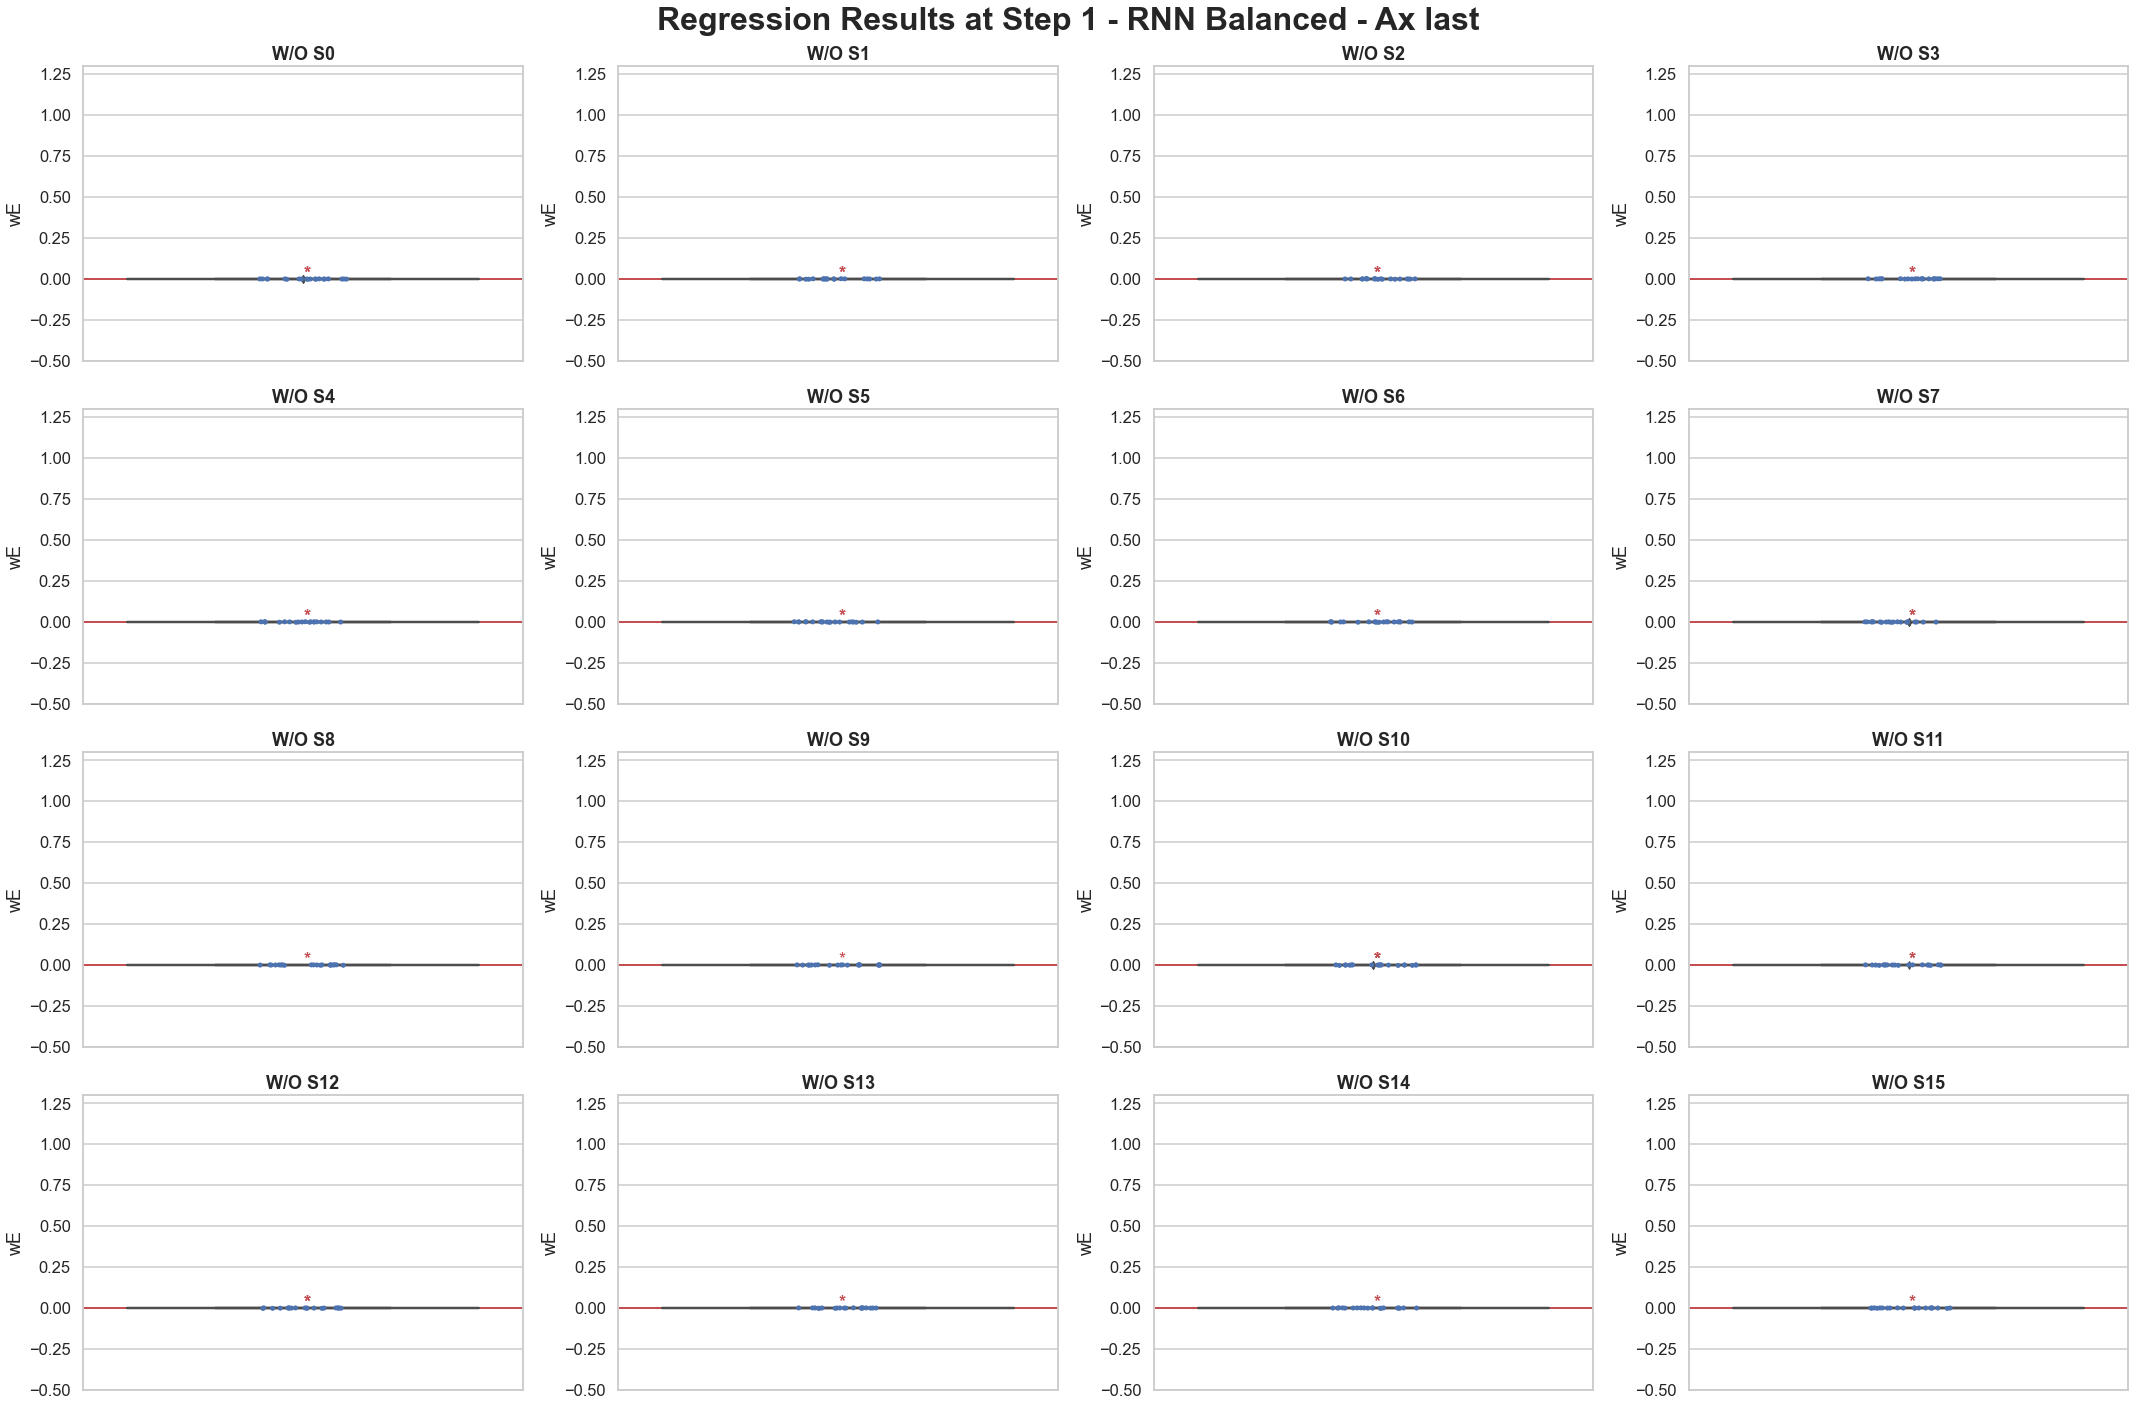

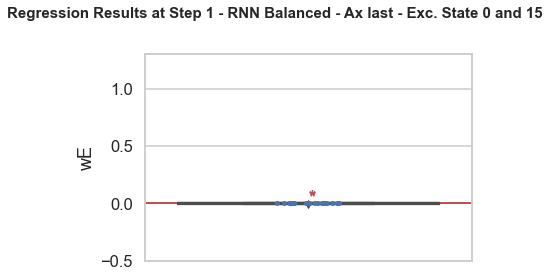

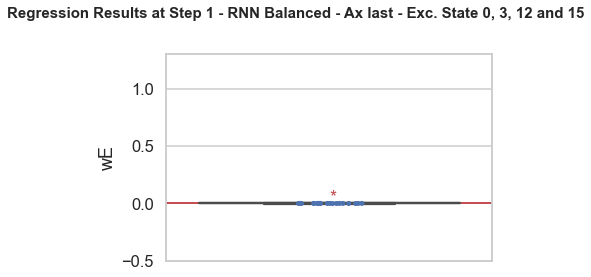

In [ ]:
ctx_order, ctx_order_str = 'last', 'ctxL'
plot_reg_exc(ctx_order, ctx_order_str, param_rnnb_ctxL, p_val_rnnb_ctxL, 'RNN Balanced', 'rnnbalanced')

# Cognitive Controller

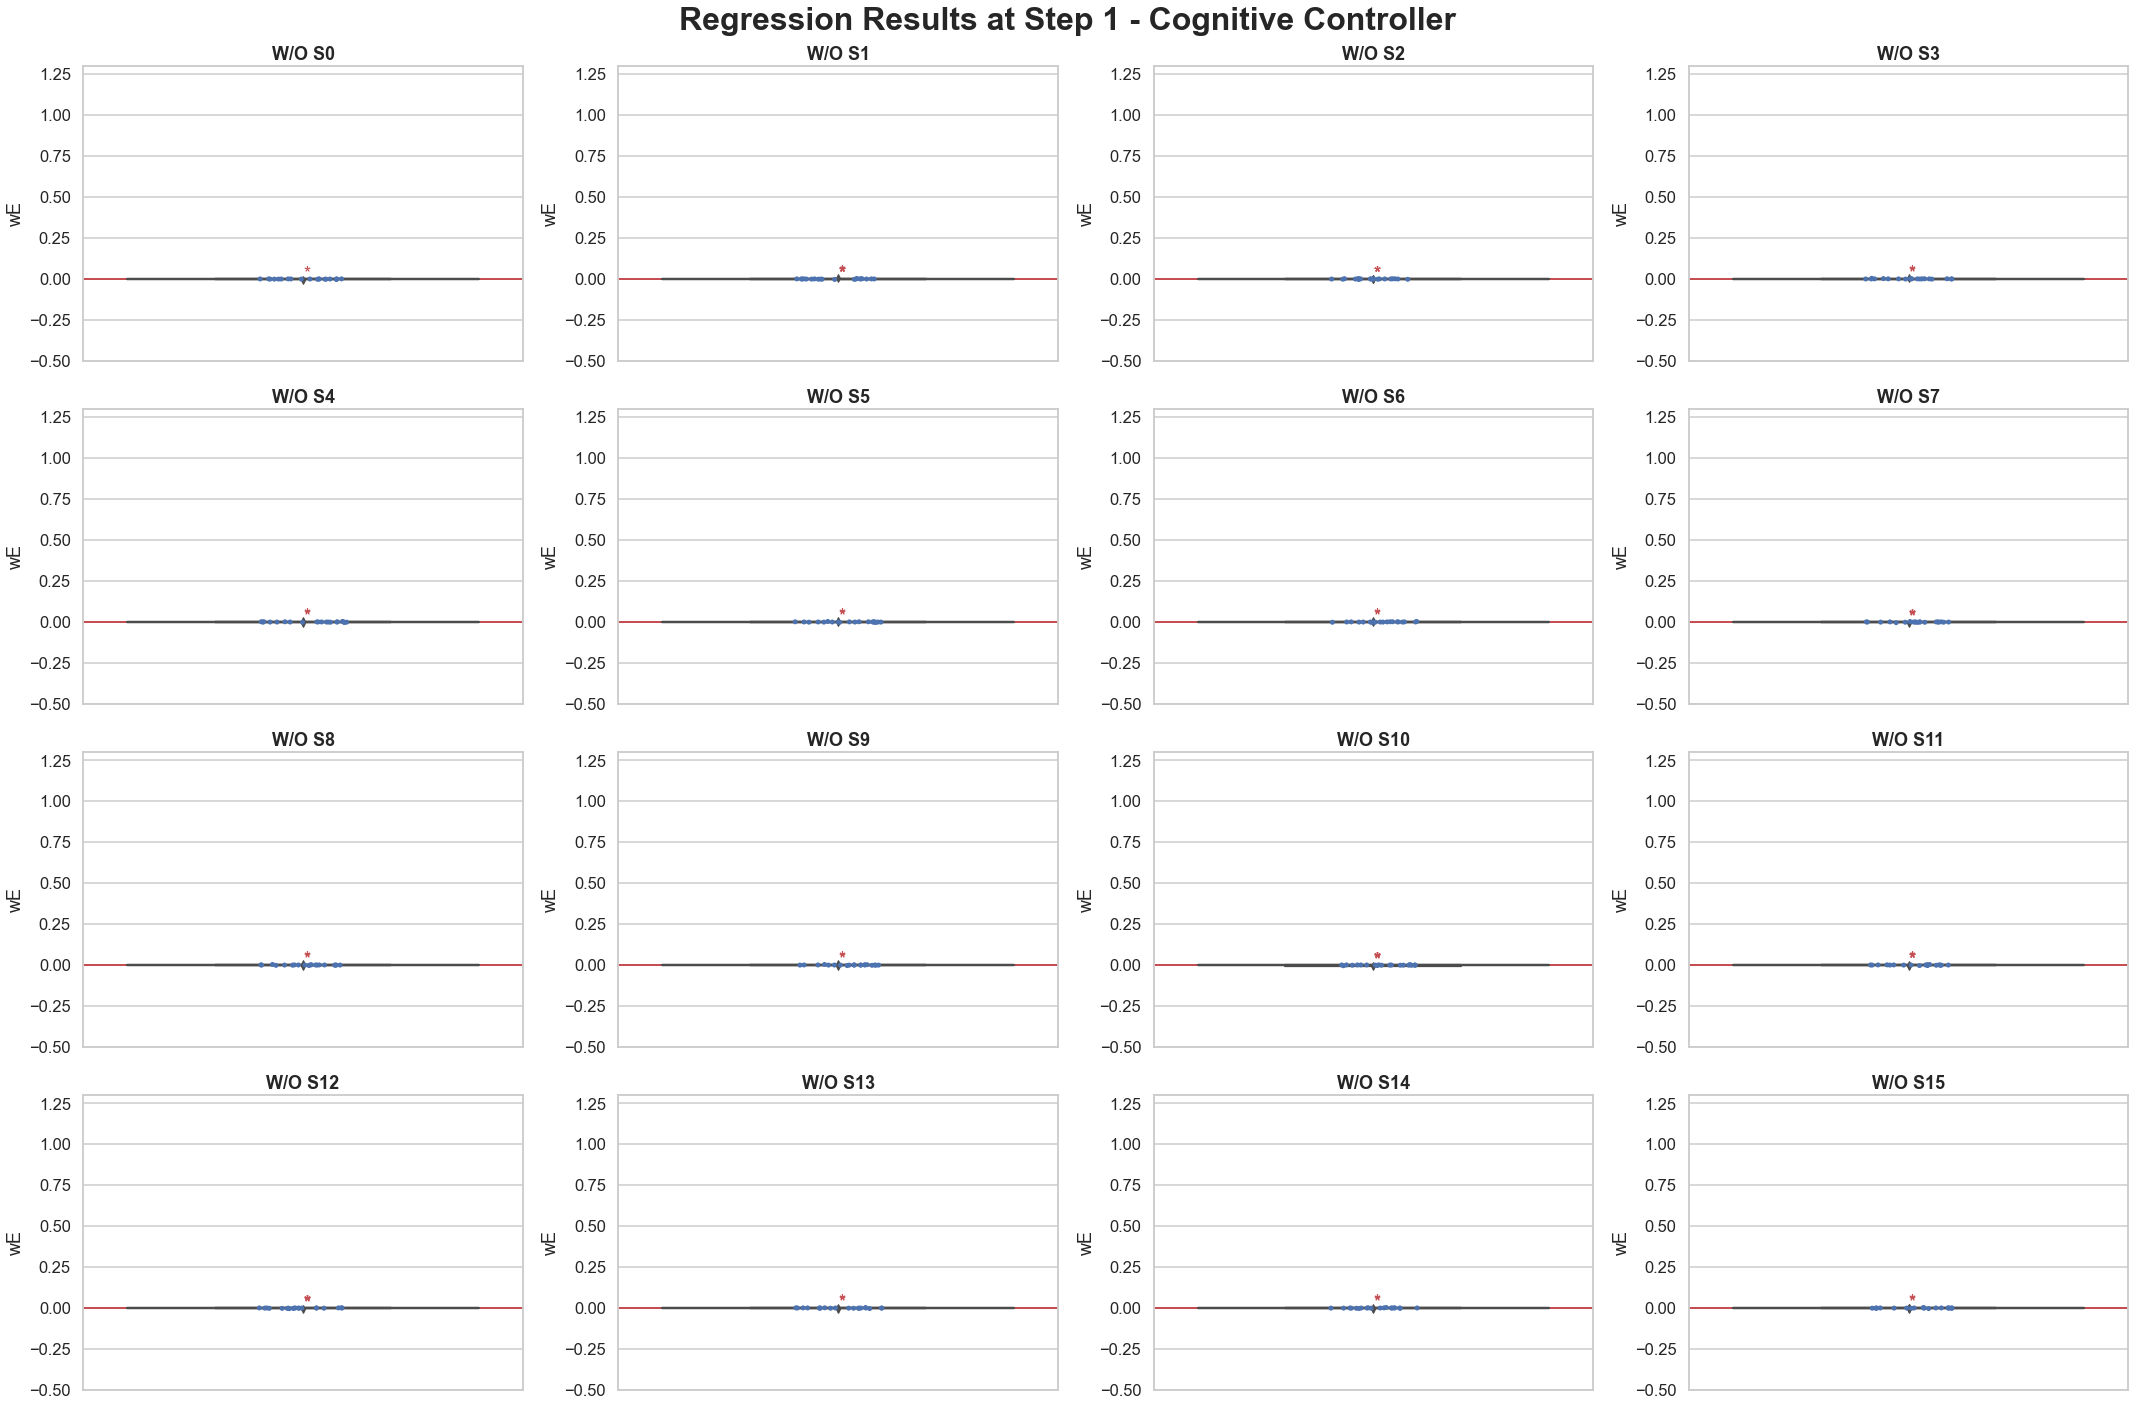

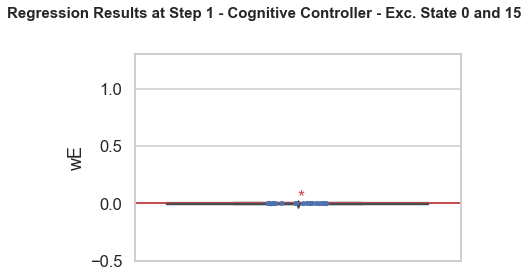

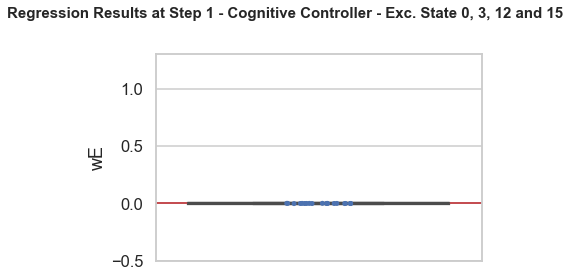

In [ ]:
ctx_order, ctx_order_str = None, None
plot_reg_exc(ctx_order, ctx_order_str, param_mlpcc, p_val_mlpcc, 'Cognitive Controller', 'mlpcc')